                                                news category
0  Bangladesh defeats Zimbabwe in thrilling T20I ...   sports
1  Shakib Al Hasan named Player of the Series aga...   sports
2  BCB announces shortlist for upcoming Asia Cup ...   sports
3  Rain disrupts Dhaka Premier League match, play...   sports
4  Tigers eye World Cup qualification spot with u...   sports
                                                news  category
3  Rain disrupts Dhaka Premier League match, play...    sports
4  Tigers eye World Cup qualification spot with u...    sports
5  Prime Minister inaugurates new development pro...  politics
6  Opposition party demands fresh elections due t...  politics
7  Parliament passes new law aimed at curbing cor...  politics
Accuracy: 1.0
Predicted category: sports


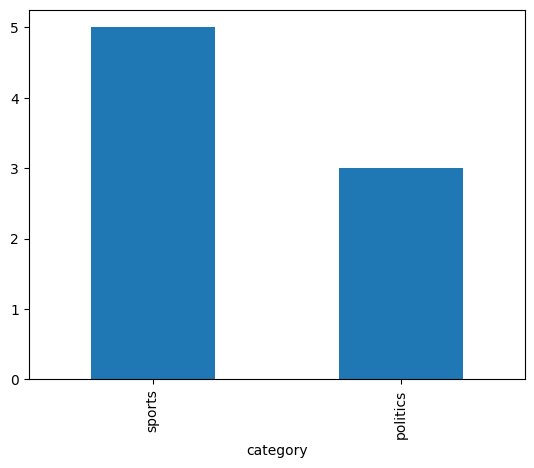

In [1]:
import pandas as pd
sports_news = [
    "Bangladesh defeats Zimbabwe in thrilling T20I finish",
    "Shakib Al Hasan named Player of the Series against Zimbabwe",
    "BCB announces shortlist for upcoming Asia Cup squad",
    "Rain disrupts Dhaka Premier League match, play resumes tomorrow",
    "Tigers eye World Cup qualification spot with upcoming series win",
]
politics_news = [
    "Prime Minister inaugurates new development project, promises rural upliftment",
    "Opposition party demands fresh elections due to alleged irregularities",
    "Parliament passes new law aimed at curbing corruption",

]
news_data = [(news, 'sports') for news in sports_news] + [(news, 'politics') for news in politics_news]
df = pd.DataFrame(news_data, columns=['news', 'category'])
df.head()


df['category'].value_counts().plot(kind='bar')


print(df[:5])
print(df[-5:])

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['news'])
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

new_text = "A dummy-cratic election in democratic Bangladesh"
new_text_vectorized = vectorizer.transform([new_text])
predicted_category = nb_classifier.predict(new_text_vectorized)
print("Predicted category:", predicted_category[0])
